In [56]:

import tensorflow as tf
import numpy as np

'''
Készíts egy metódust ami a cifar100 adatbázisból betölti a train és test adatokat. (tf.keras.datasets.cifar100.load_data())
Majd a tanitó, és tesztelő adatokat normalizálja, és vissza is tér velük.


Egy példa a kimenetre: train_images, train_labels, test_images, test_labels
függvény neve: cifar100_data
'''



'\nKészíts egy metódust ami a cifar100 adatbázisból betölti a train és test adatokat. (tf.keras.datasets.cifar100.load_data())\nMajd a tanitó, és tesztelő adatokat normalizálja, és vissza is tér velük.\n\n\nEgy példa a kimenetre: train_images, train_labels, test_images, test_labels\nfüggvény neve: cifar100_data\n'

In [57]:
def cifar100_data():
  (train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar100.load_data()
  train_images = train_images / 255.0
  test_images = test_images / 255.0
  return (train_images, train_labels), (test_images, test_labels)

#(train_images, train_labels), (test_images, test_labels) = cifar100_data()


'''import matplotlib.pyplot as plt

plt.imshow(train_images[3])
plt.show()'''

'import matplotlib.pyplot as plt\n\nplt.imshow(train_images[3])\nplt.show()'

In [58]:
'''
Készíts egy konvolúciós neurális hálót, ami képes felismerni a képen mi van a 100 osztály közül.
A háló kimenete legyen 100 elemű, és a softmax aktivációs függvényt használja.
Hálon belül tetszőleges számú réteg lehet..


Egy példa a kimenetre: model,
return type: keras.engine.sequential.Sequential
függvény neve: cifar100_model
'''


'\nKészíts egy konvolúciós neurális hálót, ami képes felismerni a képen mi van a 100 osztály közül.\nA háló kimenete legyen 100 elemű, és a softmax aktivációs függvényt használja.\nHálon belül tetszőleges számú réteg lehet..\n\n\nEgy példa a kimenetre: model,\nreturn type: keras.engine.sequential.Sequential\nfüggvény neve: cifar100_model\n'

In [59]:
def cifar100_model():
  model = tf.keras.models.Sequential([
      # Convolutional layer with 32 filters, 3x3 kernel size, and ReLU activation
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(32, 32, 3)),
    # Max pooling layer with 2x2 pool size
    tf.keras.layers.MaxPooling2D((2,2)),
    # Flatten layer to convert the 2D feature maps into a 1D feature vector
    tf.keras.layers.Flatten(),
    # Fully connected layer with 64 units and ReLU activation
    tf.keras.layers.Dense(64, activation='relu'),
    # Output layer with 100 units and softmax activation for classification
    tf.keras.layers.Dense(100, activation='softmax')
  ])
  return model

In [60]:
'''
Készíts egy metódust, ami a bemeneti hálot compile-olja.
Optimizer: Adam
Loss: SparseCategoricalCrossentropy(from_logits=False)

Egy példa a bemenetre: model
Egy példa a kimenetre: model
return type: keras.engine.sequential.Sequential
függvény neve: model_compile
'''


'\nKészíts egy metódust, ami a bemeneti hálot compile-olja.\nOptimizer: Adam\nLoss: SparseCategoricalCrossentropy(from_logits=False)\n\nEgy példa a bemenetre: model\nEgy példa a kimenetre: model\nreturn type: keras.engine.sequential.Sequential\nfüggvény neve: model_compile\n'

In [61]:
#from keras.saving.saving_lib import optimizer
def model_compile(model):
  model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
  return model

In [62]:
'''
Készíts egy metódust, ami a bemeneti hálót feltanítja.

Egy példa a bemenetre: model,epochs, train_images, train_labelsz
Egy példa a kimenetre: model
return type: keras.engine.sequential.Sequential
függvény neve: model_fit
'''


'\nKészíts egy metódust, ami a bemeneti hálót feltanítja.\n\nEgy példa a bemenetre: model,epochs, train_images, train_labelsz\nEgy példa a kimenetre: model\nreturn type: keras.engine.sequential.Sequential\nfüggvény neve: model_fit\n'

In [63]:
def model_fit(model, epochs, train_images, train_labels):
  model.fit(epochs=epochs, x=train_images, y=train_labels)
  return model

In [64]:
'''
Készíts egy metódust, ami a bemeneti hálót kiértékeli a teszt adatokon.

Egy példa a bemenetre: model, test_images, test_labels
Egy példa a kimenetre: test_loss, test_acc
return type: float, float
függvény neve: model_evaluate
'''


'\nKészíts egy metódust, ami a bemeneti hálót kiértékeli a teszt adatokon.\n\nEgy példa a bemenetre: model, test_images, test_labels\nEgy példa a kimenetre: test_loss, test_acc\nreturn type: float, float\nfüggvény neve: model_evaluate\n'

In [65]:
def model_evaluate(model, test_images, test_labels):
  loss, acc = model.evaluate(test_images, test_labels, verbose=0)
  return (loss, acc)

In [66]:
(train_images, train_labels), (test_images, test_labels) = cifar100_data()
model = cifar100_model()
model = model_compile(model)

model = model_fit(epochs=5, model=model, train_images=train_images, train_labels=train_labels)


loss, acc = model_evaluate(model=model, test_images=test_images, test_labels=test_labels)

loss, acc


Epoch 1/5
1563/1563 [==============================] - 51s 32ms/step - loss: 4.0470 - accuracy: 0.0806
Epoch 2/5
1563/1563 [==============================] - 48s 31ms/step - loss: 3.5401 - accuracy: 0.1525
Epoch 3/5
1563/1563 [==============================] - 49s 31ms/step - loss: 3.3303 - accuracy: 0.1878
Epoch 4/5
1563/1563 [==============================] - 49s 32ms/step - loss: 3.2250 - accuracy: 0.2092
Epoch 5/5
1563/1563 [==============================] - 48s 30ms/step - loss: 3.1536 - accuracy: 0.2200


(3.2093825340270996, 0.21770000457763672)

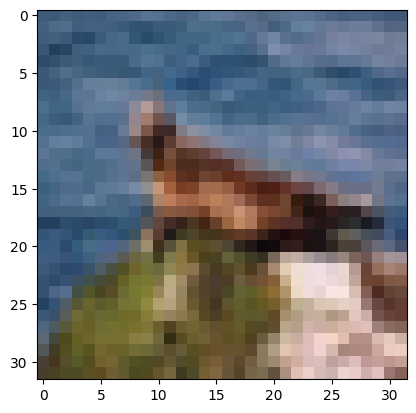

1/1 [==============================] - 0s 23ms/step
Predicted class: 67


In [75]:
test_image = test_images[2]

import matplotlib.pyplot as plt

plt.imshow(test_image)
plt.show()



test_image = test_image / 255.0

# Make a prediction on the test image
predictions = model.predict(np.array([test_image]))

# Get the index of the highest probability class
predicted_class = np.argmax(predictions)

print("Predicted class:", predicted_class)